In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import zipfile
import json

from pandas.io.json import json_normalize

import json


import pandas as pd

from sklearn.preprocessing import OrdinalEncoder
import numpy as np

from scipy.sparse import coo_matrix
from scipy import sparse
import warnings; warnings.simplefilter('ignore')
import random
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import pickle
import pandas as pd

In [4]:
df= pd.read_csv('train_12.csv',index_col=0,low_memory=False)
df

,object.storage.id,object.storage.name,src.ip,subject.account.id,subject.account.domain,event_src.host,src.asset,datafield6,time
0,\\*\w3svc1,u_ex22030722_x.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-mail-03.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x120089,2022-03-22T00:45:57Z
1,\\*\w3svc1,u_ex22030723_x.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-mail-03.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x120089,2022-03-22T00:45:57Z
2,\\*\w3svc1,u_ex22030806_x.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-mail-03.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x120089,2022-03-22T00:45:57Z
3,\\*\w3svc1,u_ex22030809_x.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-mail-03.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x120089,2022-03-22T00:45:57Z
4,\\*\w3svc1,u_ex22030810_x.log,10.10.192.57,S-1-5-21-1023191730-727829927-3985050192-32035,ptsecurity.ru,dc1-mail-03.ptsecurity.ru,165dc53b-cd40-0001-0000-0000000007ee,0x120089,2022-03-22T00:45:57Z
...,...,...,...,...,...,...,...,...,...
1919995,\\*\opp,акцепт,10.0.102.29,S-1-5-21-1023191730-727829927-3985050192-18835,ptsecurity.ru,dc2-fs-01.ptsecurity.ru,1457bbaf-9940-0001-0000-000000001019,0x100081,2022-04-07 14:58:07+00:00
1919996,\\*\opp,дуд губернатора самарской области и правительства,10.0.102.29,S-1-5-21-1023191730-727829927-3985050192-18835,ptsecurity.ru,dc2-fs-01.ptsecurity.ru,1457bbaf-9940-0001-0000-000000001019,0x100081,2022-04-07 14:58:07+00:00
1919997,\\*\opp,отгрузка сертификата vm 09.02.22,10.0.102.29,S-1-5-21-1023191730-727829927-3985050192-18835,ptsecurity.ru,dc2-fs-01.ptsecurity.ru,1457bbaf-9940-0001-0000-000000001019,0x100081,2022-04-07 14:58:07+00:00
1919998,\\*\opp,гау ит-парк,10.0.102.29,S-1-5-21-1023191730-727829927-3985050192-18835,ptsecurity.ru,dc2-fs-01.ptsecurity.ru,1457bbaf-9940-0001-0000-000000001019,0x100081,2022-04-07 14:58:07+00:00


In [5]:
# Cортировка столбцов для удобства
df=df[['subject.account.id','object.storage.name',
'object.storage.id',
'src.ip', 'event_src.host','subject.account.domain',
'src.asset','datafield6','time']]

#Обработка адресов
df=df.loc[(df['src.ip']!='127.0.0.1') & (df['src.ip']!='::1')& (df['src.ip']!='-')]

#обработка времени подключеня пользователя к тому или иному хосту
df['time'] = pd.to_datetime(df['time'])
df["dp"] = pd.to_datetime(df['time'],unit='s').apply(lambda x: "Day" if x.hour >= 10 and x.hour <= 18 else 'Morning'  if x.hour>=6 and x.hour<=10 else 'Evening'  if x.hour>=18 and x.hour<=22 else "Night")
df=df.drop(columns=['time'])

#обработка наименования хранилища, добавление столбца с типом записи 
result=df['object.storage.name'].str.split(r'[^\\]+(?=\.\w+$)',expand=True)
df['ext']=result[1]

obj_df = df.select_dtypes(include=['object']).copy()
obj_df=obj_df.fillna('un')


In [6]:
from sklearn.preprocessing import OrdinalEncoder
vectorizer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
encoded_df = pd.DataFrame(vectorizer.fit_transform(obj_df))

int_df = df.select_dtypes(include=['float64','int64']).copy()
df_enc=int_df.join(encoded_df)
df_enc=df_enc.fillna(0)

df_enc.columns = ['uid','iid','object.storage.id',
'src.ip', 'event_src.host','subject.account.domain',
'src.asset','datafield6','dp','ext']

encoded_df=df_enc[['uid','iid']]

In [13]:
from lightfm.data import Dataset
dataset = Dataset()
dataset.fit(users=encoded_df['uid'], items=encoded_df['iid'])

In [14]:
import pandas as pd

dataframe = pd.DataFrame(df_enc['uid'], columns=df_enc.uid)
scat_mtrx = pd.plotting.scatter_matrix(df_enc, c=df_enc['iid'], figsize=(10, 10), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

KeyboardInterrupt: 

In [15]:
dataset = df

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(encoded_df, 
                                                    encoded_df['iid'],
                                                    random_state=0) # random_state - для воспроизводимости

print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (2166794, 2), y_train shape: (2166794,),
X_test shape: (722265, 2), y_test shape: (722265,)


In [17]:
x_train_concat = np.concatenate((x_train, y_train.values.reshape(2166794, 1)), axis=1)
x_test_concat = np.concatenate((x_test, y_test.values.reshape(722265, 1)), axis=1)
print(f'X_train shape: {x_train_concat.shape},\n'
      f'X_test shape: {x_test_concat.shape}')

X_train shape: (2166794, 3),
X_test shape: (722265, 3)


In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [19]:
import time
start = time.time()
knn_model = knn.fit(x_train, y_train)
end = time.time()
print("Потраченное на обучение время = {0:.{1}f} секунд".format(end - start, 2))

Потраченное на обучение время = 3.22 секунд


In [33]:
x_test

,uid,iid
1285247,442.0,16599.0
332378,442.0,23882.0
404410,442.0,23421.0
349223,442.0,23564.0
67144,442.0,6578.0
...,...,...
769,498.0,19516.0
789817,501.0,25454.0
20485,231.0,21378.0
411308,442.0,16279.0


In [20]:
knn_predictions = knn.predict(x_test)
knn_predictions

array([16599., 23882., 23421., ..., 21378., 16279., 24309.])

In [21]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, knn_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9782420579704125


In [32]:
knn_predictions.size

722265

In [37]:
y_test

1285247    16599.0
332378     23882.0
404410     23421.0
349223     23564.0
67144       6578.0
            ...   
769        19516.0
789817     25454.0
20485      21378.0
411308     16279.0
1559247    24309.0
Name: iid, Length: 722265, dtype: float64

In [19]:
conda install pytorch torchvision -c pytorch

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\darya\anaconda3

  added / updated specs:
    - pytorch
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libuv-1.44.2               |       h2bbff1b_0         288 KB
    pytorch-2.0.1              |      py3.9_cpu_0       145.4 MB  pytorch
    pytorch-mutex-1.0          |              cpu           3 KB  pytorch
    torchvision-0.15.2         |         py39_cpu         6.5 MB  pytorch
    ------------------------------------------------------------
                                           Total:       152.2 MB

The following NEW packages will be INSTALLED:

  libuv              pkgs/main/win-64::libuv-1.44.2-h2bbff1b_0 
  pytorch            pytorch/win-64::pytorch-2.0.1-py3.9_cpu_0 
  pytorch-mutex      pytorch/noarch::pytorch-mutex-1.0

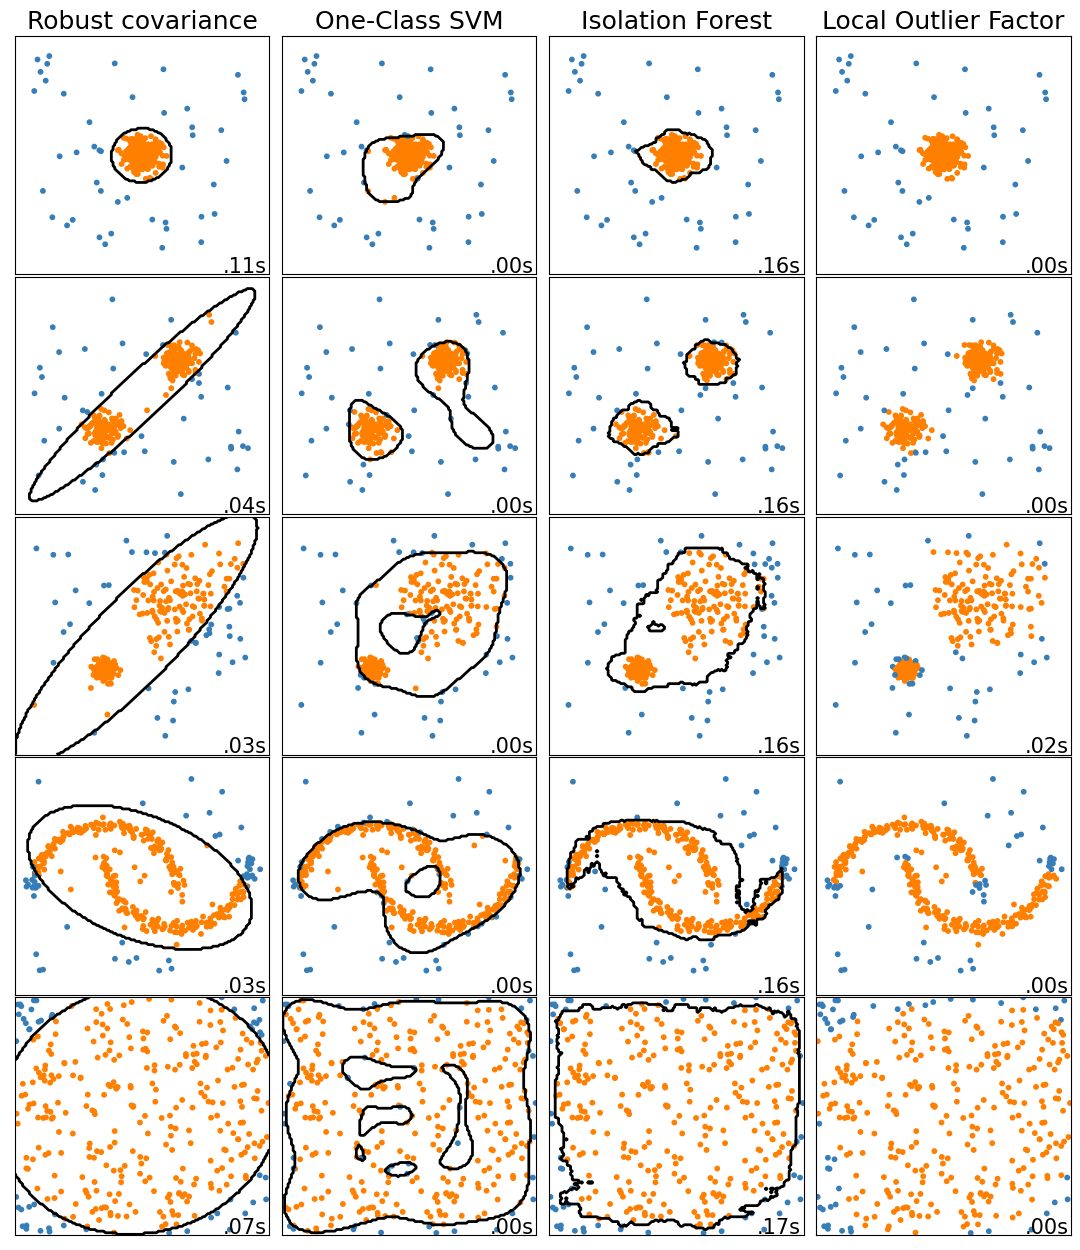

In [36]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

# Example settings
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)),
    ("Isolation Forest", IsolationForest(
                                         contamination=outliers_fraction,
                                         random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(
        n_neighbors=35, contamination=outliers_fraction))]

# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5],
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3],
               **blobs_params)[0],
    4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -
          np.array([0.5, 0.25])),
    14. * (np.random.RandomState(42).rand(n_samples, 2) - 0.5)]

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 150),
                     np.linspace(-7, 7, 150))

plt.figure(figsize=(len(anomaly_algorithms) * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
rng = np.random.RandomState(42)

for i_dataset, X in enumerate(datasets):
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6,
                       size=(n_outliers, 2))], axis=0)

    for name, algorithm in anomaly_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

        # plot the levels lines and the points
        if name != "Local Outlier Factor":  # LOF does not implement predict
            Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

        colors = np.array(['#377eb8', '#ff7f00'])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()